In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
import matplotlib.pyplot as plt
import select_features
#archivo = '..\data\ISBSG - Release May 2017 R1.csv'
archivo = '..\data\ISBSG DATA Release 12.csv'
df = pd.read_csv(archivo, sep = ';', low_memory = False)
#variables = ['Data Quality Rating', 'UFP rating', 'Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Count Approach', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Summary Work Effort', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Resource Level', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count', 'Agile Method Used']
variables = ['Data Quality Rating', 'UFP rating', 'Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Count Approach', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Summary Work Effort', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Resource Level', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count']
df = df.loc[:, variables]
filtro = ((df['Data Quality Rating'] == 'A') | (df['Data Quality Rating'] == 'B')) & ((df['UFP rating'] == 'A') | (df['UFP rating'] == 'B')) 
df = df.loc[filtro, :]
filtro = (df['Normalised Work Effort Level 1'].notnull()) & (df['Normalised Work Effort Level 1'] == df['Summary Work Effort'])
df = df.loc[filtro, :]
filtro = df['Count Approach'] == 'IFPUG 4+'
df = df.loc[filtro, :]
#variables = ['Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count', 'Agile Method Used']
variables = ['Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count']
df = df.loc[:, variables]
df = df.dropna(axis=1, thresh=int(0.5*len(df)))
df = df.dropna()
print(len(df))
df['Project Elapsed Time'] = df['Project Elapsed Time'].str.replace(',', '.').astype(float)
programmingLenguaje = {'A:G':'Unspecified', 'ASP.Net':'ASP', 'BASIC':'Visual Basic', 'CSP':'Unspecified', 'Visual C':'C'}
df['Primary Programming Language'].replace( programmingLenguaje, inplace = True)
database = {'[;].*':';','ACCESS[; ].*':'ACCESS', 'MS Access':'ACCESS', 'ACCESS;':'ACCESS', 'ADABAS;':'ADABAS', 'Micosoft.*':'Attain', 'DB2[; /].*':'DB2', 'IBM DB2':'DB2', 'UDB2':'DB2', 'Domino[ ].*':'Domino', 'LOTUS.*':'Domino', 'Notes.*':'Domino', 'Exchange.*':'Exchange', 'FOXPRO;':'Foxpro', 'HIRDB;':'HIRDB', 'DB[/].*':'IMS', 'DEDB;':'IMS', 'IDMS[; -].*':'IMS', 'IMS.*':'IMS', 'MS[- ]SQL[; ].*':'MS SQL', 'MSDE.*':'MS SQL', 'SQL Server[; ].*':'MS SQL', 'SQL;':'MS SQL', 'VSE/.*':'MS SQL', 'NCR;':'NCR', 'Oracle.*':'ORACLE', 'Personal O.*':'ORACLE', 'RDB[; ].*':'ORACLE', 'CICS;':'ORACLE', 'SAS;':'SAS', 'Solid;':'Solid', 'SYBASE.*':'SYBASE', 'YES':'Unspecified', 'ISAM;':'Unspecified', 'multiple;':'Unspecified', 'VSAM[; ].*':'Unspecified', 'WATCOM[; ].*':'Watcom', 'WGRES;':'WGRES'}
df['1st Data Base System'].replace( database, inplace = True, regex = True)
df['1st Data Base System'].replace( {'ACCESS;':'ACCESS'}, inplace = True, regex = True)
#df = select_features.recodeDataframe(df)

621


In [3]:
mRMR = select_features.calcular_mRMR('Normalised Work Effort Level 1', df)
mRMR

0
1
2
3
4
5
6
7
8
9
10


In [3]:
mRMR = select_features.calcular_mRMRV2('Normalised Work Effort Level 1', df)ç
mRMR

,Industry Sector,Application Group,Development Type,Development Platform,Language Type,Primary Programming Language,Functional Size,Adjusted Function Points,Normalised Work Effort Level 1,Project Elapsed Time,1st Data Base System,Used Methodology
5,Insurance,Business Application,New Development,MF,3GL,Java,620.0,620.0,18160.0,7.0,IMS,Don't Know
33,Government,Business Application,New Development,MF,3GL,COBOL,243.0,250.0,2924.0,8.0,DB2,Yes
54,Utilities,Business Application,New Development,MF,3GL,PL/I,163.0,152.0,668.0,9.0,DB2,Yes
90,Manufacturing,Business Application,New Development,Multi,4GL,SQL,702.0,702.0,4805.0,12.3,ORACLE,Don't Know
106,Service Industry,Business Application,New Development,PC,3GL,C#,90.0,101.0,2006.0,5.0,MS SQL,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
5954,Government,Business Application,Enhancement,MF,3GL,COBOL,12.0,12.0,129.0,3.0,Unspecified,Yes
5965,Financial,Business Application,New Development,Multi,4GL,PowerBuilder,478.0,478.0,2716.0,5.8,ORACLE,Don't Know
5991,Financial,Business Application,Enhancement,MR,3GL,COBOL,242.0,213.0,2185.0,7.0,ORACLE,No
5995,Government,Business Application,Enhancement,MF,3GL,PL/I,96.0,96.0,1011.0,6.0,DB2,Yes


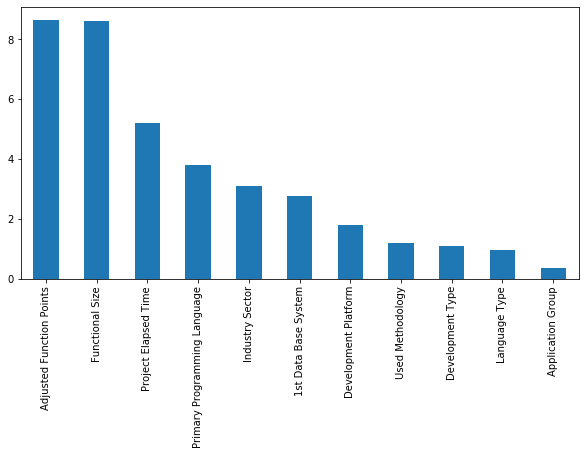

In [2]:
#Con la libreria info-gain https://pypi.org/project/info-gain/
mi = select_features.calcularMi_ManualInfo_gain('Normalised Work Effort Level 1', df)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
df

Adjusted Function Points        0.956524
Functional Size                 0.955140
Project Elapsed Time            0.707565
Primary Programming Language    0.569439
Industry Sector                 0.486520
1st Data Base System            0.447903
Development Platform            0.314327
Used Methodology                0.219722
Development Type                0.202390
Language Type                   0.172220
Application Group               0.073070
dtype: float64


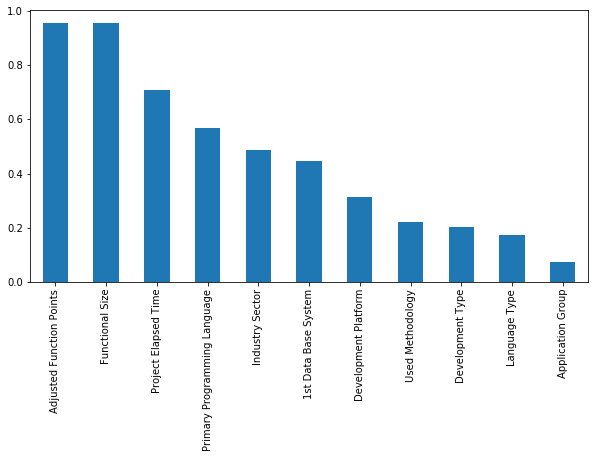

In [2]:
#Utilizando el método normalize_mutual_info_score
mi = select_features.calcularMi_Manual('Normalised Work Effort Level 1', df)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
print(mi)

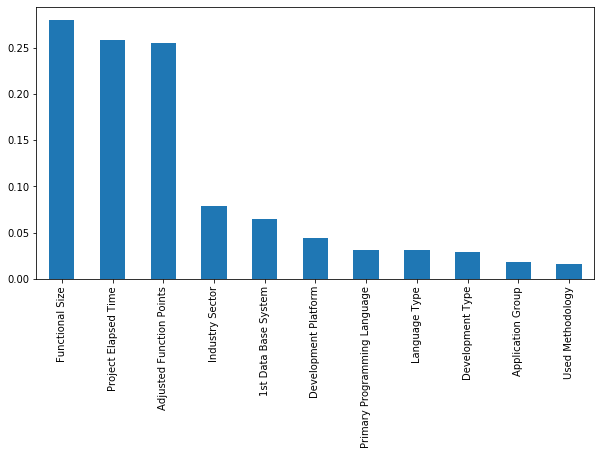

In [8]:
#Utilizando mutual_info_regression
mi = select_features.calcularMI('Normalised Work Effort Level 1', df)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))

In [4]:
fs=select_features.selectKBestMi(df)
print(fs.scores_)

[0.04952399 0.01492395 0.         0.0306834  0.00461322 0.02306272
 0.29390013 0.2687098  0.20816768 0.0583715  0.        ]


In [ ]:
df.dtypes

In [ ]:
#variables = ['Industry Sector', 'Application Group', 'Development Type', 'Platform Development', 'Language Type', 'Primary Programming Language', '1st Data Base System', 'Used Methodology']
variables = ['1st Data Base System']
dcount = df.loc[:, variables]
for c in dcount.columns:
    print("---- %s ---" % c)
    print(dcount[c].value_counts())
    print('')